# **[Chapter 01]**  
**┗ 의류 판매량 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「시계열 데이터 모델링」
* 🥇Session 3 - 「Random Forest 모델링」

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

# 경로 설정 -> Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/인공지능/ML_Project_Collection/의류판매량예측')
os.getcwd()

'/content/drive/MyDrive/인공지능/ML_Project_Collection/의류판매량예측'

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
A 의류 회사에서는 생산량을 조절하기 위해서 판매량을 예측하려 한다.
의류의 종류에 따라 계절성을 많이 타기 때문에, 이러한 특성을 고려할 수 있는 모델링이 필요하다.
일단, 데이터 살펴보면서 의류 판매량 예측을 진행해보도록 하자.
```



> **데이터 살펴보기**

* 일자별 의류 판매량
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|SEASON|SS, AW|
|TYPE|국내, 해외 등|
|2016-01-01|날짜..|
|...||
|2019-12-31|날짜..|

In [2]:
%pip install mxnet gluonts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [3]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.read_excel('Data/WEAR_TS_ALL.xlsx')
df.head()

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

해당 Python 코드는 pandas 라이브러리를 사용하여 Excel 파일을 읽어들이는 코드입니다. 코드를 한 줄씩 설명하겠습니다.

1. `import pandas as pd`
   - pandas 라이브러리를 불러오며, 이후 코드에서 `pd`라는 이름으로 pandas를 참조합니다.
   
2. `pd.set_option('display.max_columns',100)`
   - pandas의 출력 옵션을 설정하여, DataFrame이 화면에 표시될 때 최대 열(column) 수를 100개로 지정합니다.
   
3. `pd.set_option('display.max_rows',100)`
   - pandas의 출력 옵션을 설정하여, DataFrame이 화면에 표시될 때 최대 행(row) 수를 100개로 지정합니다.
   
4. `df = pd.read_excel('Data/WEAR_TS_ALL.xlsx')`
   - `pd.read_excel` 함수를 이용하여 'Data/WEAR_TS_ALL.xlsx' 경로에 있는 Excel 파일을 읽어들여, 이를 DataFrame 객체로 저장합니다. 이 DataFrame 객체는 이후 `df`라는 변수를 통해 참조할 수 있습니다.
   
5. `df.head()`
   - `head()` 함수는 DataFrame의 첫 5행을 반환합니다. 이 코드는 DataFrame `df`의 상위 5개 행을 출력합니다.

따라서, 이 코드는 pandas 라이브러리를 이용하여 'Data/WEAR_TS_ALL.xlsx' Excel 파일을 읽어들이고, 해당 파일의 상위 5행을 최대 100개의 열과 행으로 화면에 표시합니다.

In [4]:
df.shape

(515, 1463)

# **Data Spec Check**
---
> **Data 가공 명세서**

<img src = "https://drive.google.com/uc?id=15mCoX5yKTp3yFgjdNEDKz2wcU-iHn61Q">

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 회사에서 재고에 대한 걱정이 늘어나고 있다.
판매량을 알 수 있다면 재고 비용을 비약적으로 줄일 수 있을 것으로 기대하고 있다.
판매량 예측 모델을 만들어보자.
```  

> **기대효과**

```
▶ 의류 시장에서의 큰 비용 중에 하나는 재고 비용이다. 적정 생산량을 통해 재고 비용을 줄일 수 있다.
```

> **해결방안**

```
▶ 시계열 예측을 통한 판매량 예측, RandomForest를 활용한 판매량 예측
▶ Session 1 🥉
 - Data Preprocessing
 - Data Visualization
▶ Session 2 🥈
 - 시계열 예측 모델링
▶ Session 3 🥇
 - RandomForest Regression을 통한 모델링
```

> **성과측정**  

```
▶ 실제 판매량과 예측량의 차이
```

> **현업적용**  

```
▶ 시계열 특성을 가진 데이터를 만났을 때, 접근할 수 있는 방법 체득
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Data Preprocessing, Data Visualization
▶ Session 2 → 시계열 예측 모델링
▶ Session 3 → RandomForest Regression 모델링
```

# 🥉Session 1 - 「Data 전처리 및 EDA」

## · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)


In [5]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.dates import date2num

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

mx.random.seed(0)
np.random.seed(0)

In [6]:
ts_df = pd.read_excel('Data/WEAR_TS_ALL.xlsx')
ts_df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
print(ts_df.shape)

(515, 1463)


In [8]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 1463 entries, SEASON to 2019-12-31 00:00:00
dtypes: float64(1461), object(2)
memory usage: 5.7+ MB


In [9]:
ts_df.dtypes

SEASON                  object
TYPE                    object
2016-01-01 00:00:00    float64
2016-01-02 00:00:00    float64
2016-01-03 00:00:00    float64
                        ...   
2019-12-27 00:00:00    float64
2019-12-28 00:00:00    float64
2019-12-29 00:00:00    float64
2019-12-30 00:00:00    float64
2019-12-31 00:00:00    float64
Length: 1463, dtype: object

In [10]:
# 국내와 해외는 특성 차이로 인해 동시에 모델링 불가, 국낸 데이터만 필터링
ts_df = ts_df[ts_df['TYPE']=='국내']
ts_df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
# 시즌별 판매량 예측이 목적이므로 SEASON으로 묶어서 합계를 생성
ts_df = ts_df.groupby('SEASON').sum()
ts_df

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,...,2019-11-12,2019-11-13,2019-11-14,2019-11-15,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
SEASON,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16SS,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,3.0,7.0,6.0,1.0,3.0,6.0,25.0,20.0,38.0,25.0,28.0,21.0,33.0,41.0,44.0,91.0,100.0,57.0,73.0,79.0,96.0,82.0,170.0,38.0,11.0,104.0,165.0,104.0,155.0,182.0,210.0,105.0,130.0,108.0,124.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,-6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
19SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,-1.0,-3.0,5.0,-6.0,2.0,12.0,40.0,-9.0,17.0,-4.0,-5.0,0.0,4.0,-1.0,0.0,-2.0,-3.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0


In [12]:
# 날짜별 판매량을 행으로 다루기 위해 Transpose
ts_df = ts_df.T
ts_df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,0.0,0.0
2019-12-28,0.0,0.0,3.0,0.0,2.0
2019-12-29,0.0,0.0,0.0,0.0,2.0
2019-12-30,0.0,0.0,0.0,0.0,0.0


In [13]:
ts_df.index

Index([2016-01-01 00:00:00, 2016-01-02 00:00:00, 2016-01-03 00:00:00,
       2016-01-04 00:00:00, 2016-01-05 00:00:00, 2016-01-06 00:00:00,
       2016-01-07 00:00:00, 2016-01-08 00:00:00, 2016-01-09 00:00:00,
       2016-01-10 00:00:00,
       ...
       2019-12-22 00:00:00, 2019-12-23 00:00:00, 2019-12-24 00:00:00,
       2019-12-25 00:00:00, 2019-12-26 00:00:00, 2019-12-27 00:00:00,
       2019-12-28 00:00:00, 2019-12-29 00:00:00, 2019-12-30 00:00:00,
       2019-12-31 00:00:00],
      dtype='object', length=1461)

In [14]:
# 현재 index는 날짜형 index가 아니므로 날짜형 index로 변경
ts_df.index = pd.to_datetime(ts_df.index)
ts_df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,0.0,0.0
2019-12-28,0.0,0.0,3.0,0.0,2.0
2019-12-29,0.0,0.0,0.0,0.0,2.0
2019-12-30,0.0,0.0,0.0,0.0,0.0


In [15]:
ts_df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=1461)

In [16]:
# 각 시즌별 상품은 각 시즌에 대부분 판매되기 때문에 판매량이라는 기준으로 통합
df = pd.concat([
                    ts_df[ts_df.index.year==2016]['16SS'],
                    ts_df[ts_df.index.year==2017]['17SS'],
                    ts_df[ts_df.index.year==2018]['18SS'],
                    ts_df[ts_df.index.year==2019]['19SS']
            ])
df = pd.DataFrame(df, columns=['sales'])
df

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0
2019-12-30,0.0


이 코드는 pandas 라이브러리를 사용하여 여러 조건에 맞는 특정 열(column)을 선택하여 새로운 DataFrame을 생성합니다. 여기서 `ts_df`는 이미 존재하는 다른 DataFrame일 것으로 보입니다.

1. `ts_df[ts_df.index.year==2016]['16SS']`
   - `ts_df`에서 인덱스의 년도가 2016인 행들을 선택하고, 그 행들에서 '16SS' 열을 선택합니다.
   
2. `ts_df[ts_df.index.year==2017]['17SS']`
   - `ts_df`에서 인덱스의 년도가 2017인 행들을 선택하고, 그 행들에서 '17SS' 열을 선택합니다.
   
3. `ts_df[ts_df.index.year==2018]['18SS']`
   - `ts_df`에서 인덱스의 년도가 2018인 행들을 선택하고, 그 행들에서 '18SS' 열을 선택합니다.
   
4. `ts_df[ts_df.index.year==2019]['19SS']`
   - `ts_df`에서 인덱스의 년도가 2019인 행들을 선택하고, 그 행들에서 '19SS' 열을 선택합니다.

5. `pd.concat([...])`
   - 위에서 선택한 각각의 Series들을 세로 방향으로 연결(concatenate)하여 하나의 Series로 만듭니다.

6. `df = pd.DataFrame(df, columns=['sales'])`
   - 이전 단계에서 생성한 Series를 사용하여 새로운 DataFrame `df`를 생성합니다. 이 DataFrame은 단 하나의 열(column) 'sales'를 가지게 됩니다.

7. `df`
   - 마지막으로, 새로 생성된 DataFrame `df`를 출력합니다.

따라서, 이 코드의 결과로 `df`라는 새로운 DataFrame은 2016년부터 2019년까지 각 년도에 해당하는 '16SS', '17SS', '18SS', '19SS' 열의 값을 'sales' 열로 가진 상태로 생성됩니다.

<Axes: >

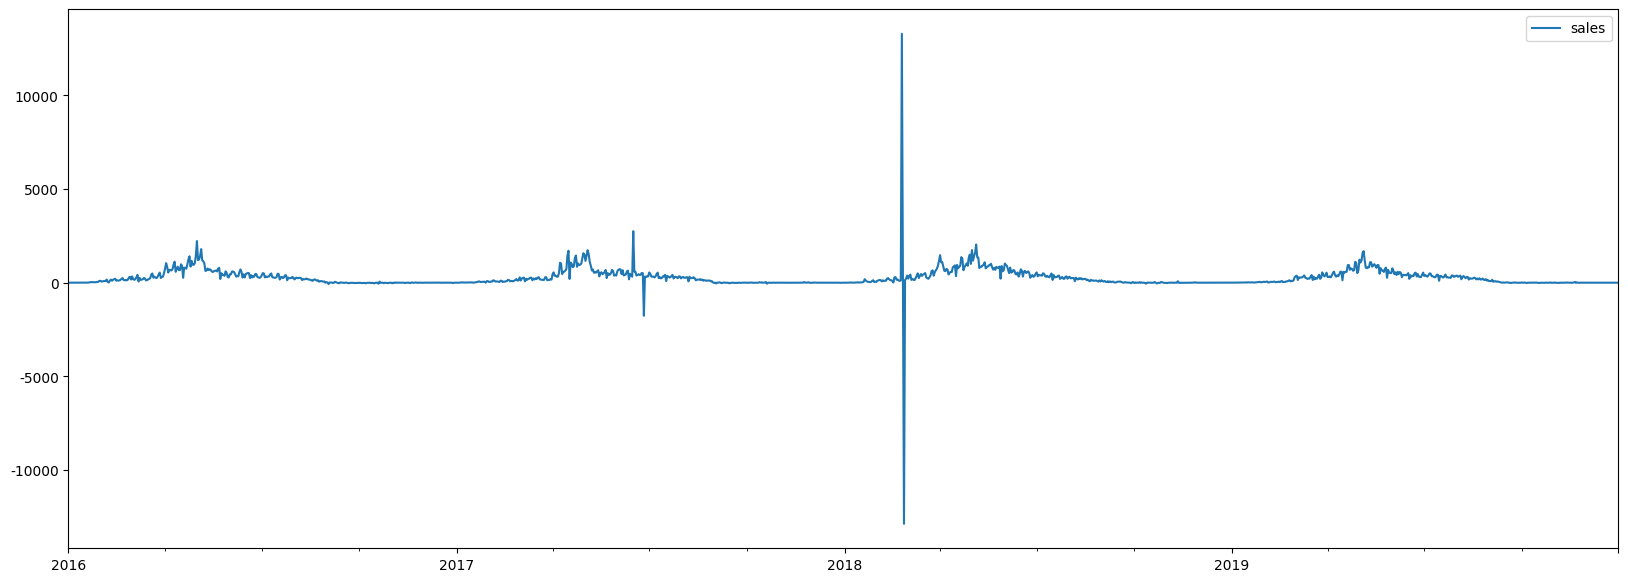

In [17]:
df.plot(figsize=(20, 7))

In [18]:
# 시스템 오류로 인해 발생한 outlier 삭제를 위해 값 치환
df[(df['sales']<-1000) | (df['sales']>2500)] = 0

<Axes: >

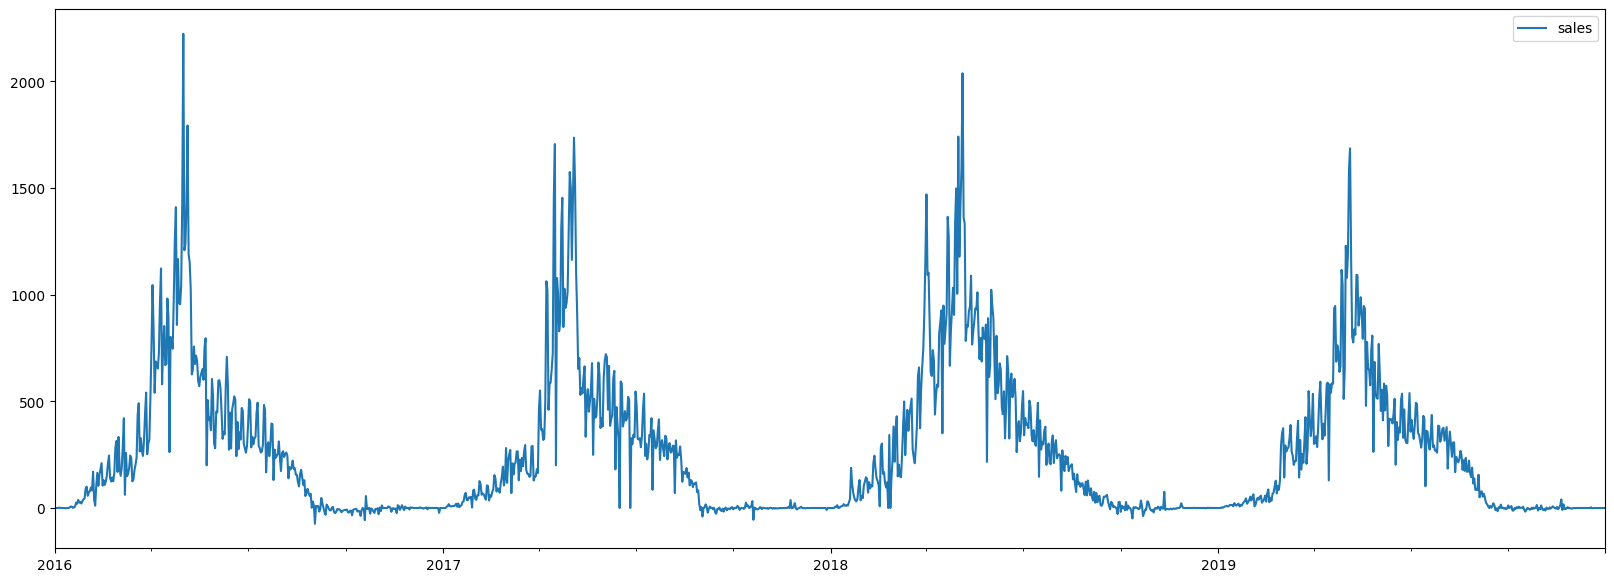

In [19]:
df.plot(figsize=(20,7))

In [20]:
# 학습데이터는 2019년 여름 시즌 이전까지
train_df = df[:-200]
# 테스트 데이터는 2019년 여름 시즌부터 겨울 시즌전까지 Peak 100일에 대한 예측
test_df = df[-200:-100]

<Axes: >

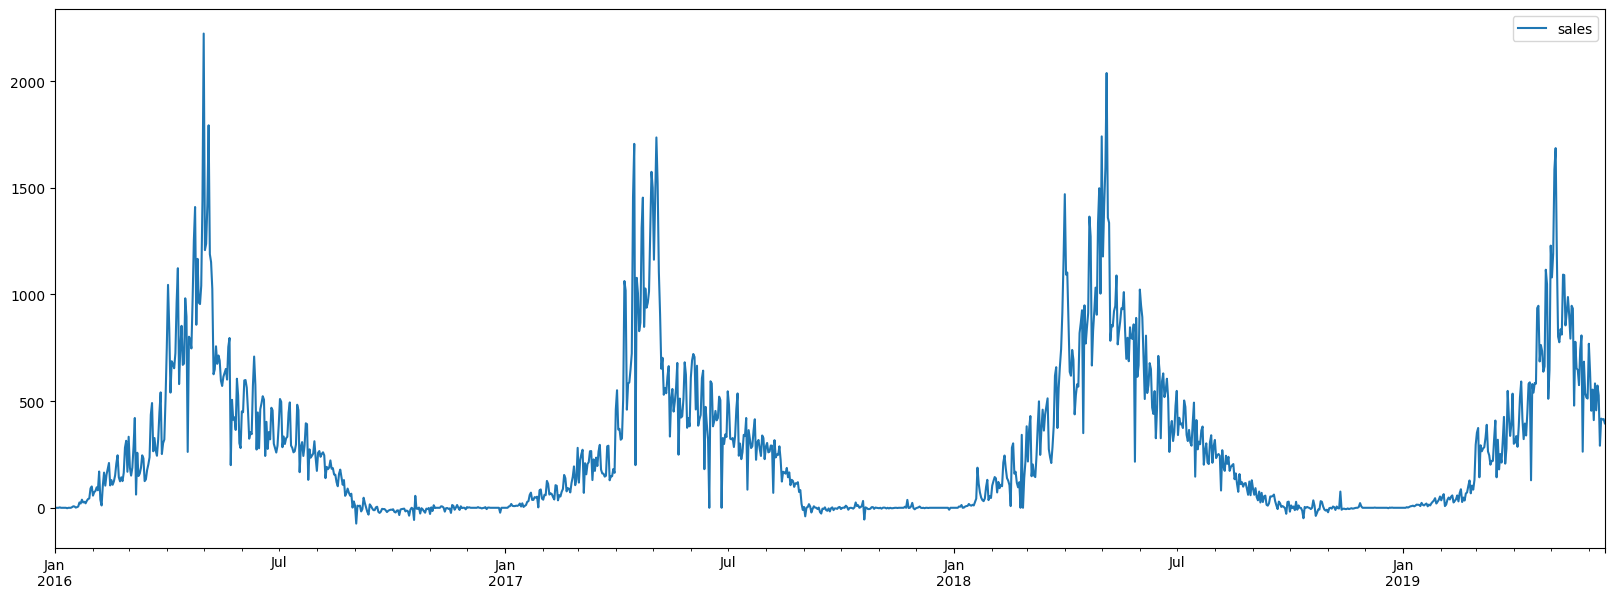

In [21]:
train_df.plot(figsize=(20,7))

<Axes: >

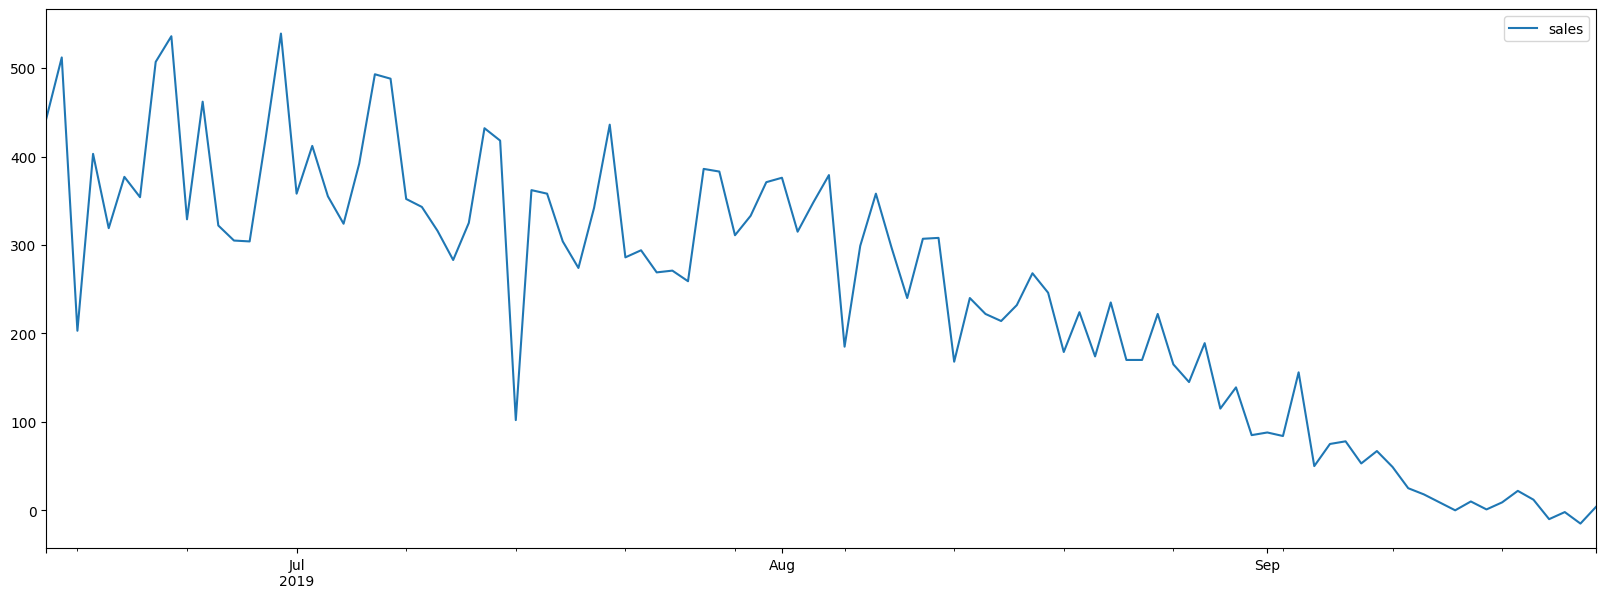

In [22]:
test_df.plot(figsize=(20,7))

# 🥈Session 2
**┗ 시계열 예측 모델링**  
---

## Time series data model using DeepAR

In [23]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from pathlib import Path

In [24]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    prediction_intervals = (90.0, 50.0)
    legend = ["Sales", "observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(20, 7))

    ts_entry.plot(ax=ax)

    # Median prediction
    median = forecast_entry.median
    ax.plot(ts_entry.index[-len(median):], median, color='g')  # Assuming ts_entry and forecast_entry have the same frequency and alignment

    # Prediction intervals
    for pi in prediction_intervals:
        lower_bound = forecast_entry.quantile(0.5 - pi/200)
        upper_bound = forecast_entry.quantile(0.5 + pi/200)
        ax.fill_between(ts_entry.index[-len(median):], lower_bound, upper_bound, color='g', alpha=0.3)

    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()



---

이 함수는 주어진 시계열 데이터(`ts_entry`)와 예측 결과(`forecast_entry`)를 사용하여 예측 및 실제 값을 시각화하는 함수입니다.

1. **예측 구간 설정**:
    - `prediction_intervals` 변수로 90%와 50%의 예측 구간을 설정합니다. 예측의 불확실성을 시각적으로 표현하기 위한 것입니다.

2. **범례 설정**:
    - `legend` 변수로 그래프의 범례를 설정합니다. 범례는 "Sales", "observations", "median prediction" 등의 항목과 함께 90%와 50% 예측 구간에 대한 정보를 포함합니다.

3. **그래프의 기본 틀 설정**:
    - `plt.subplots`를 사용하여 그래프의 기본 틀을 설정합니다. 그래프의 크기는 20x7로 지정되어 있습니다.

4. **실제 시계열 데이터 표시**:
    - `ts_entry.plot(ax=ax)`를 사용하여 실제 시계열 데이터를 그래프에 표시합니다.

5. **중간 예측값 표시**:
    - 예측 결과의 중앙값(또는 중간 예측값)을 `median` 변수에 저장합니다.
    - `ax.plot`를 사용하여 이 중앙값을 그래프에 초록색으로 표시합니다.

6. **예측 구간 표시**:
    - `for pi in prediction_intervals` 반복문을 사용하여 각 예측 구간에 대한 정보를 그래프에 표시합니다.
    - `forecast_entry.quantile`을 사용하여 예측 결과의 하위 및 상위 구간을 계산합니다.
    - `ax.fill_between`을 사용하여 계산된 예측 구간을 그래프에 채워 표시합니다.

7. **기타 설정 및 그래프 출력**:
    - `plt.grid`를 사용하여 그래프에 격자를 추가하고, `plt.legend`로 범례를 왼쪽 상단에 표시합니다.
    - `plt.show`를 사용하여 그래프를 출력합니다.

---

**주의점**:
- 코드에서 `forecast_entry.median`과 `forecast_entry.quantile`를 사용하고 있는데, 이는 `forecast_entry`가 GluonTS의 `Forecast` 객체라고 가정한 것입니다. 만약 `forecast_entry`가 다른 타입의 객체라면, 해당 객체의 속성과 메서드에 따라 코드를 수정해야 합니다.

In [25]:
train_df.head(1)

,sales
2016-01-01,0.0


In [26]:
test_df.head(1)

,sales
2019-06-15,442.0


In [27]:
train_df.values.flatten()

array([  0.,   0.,   0., ..., 414., 416., 396.])

In [28]:
# DeepAR 알고리즘을 사용하기 위해 미리 만들어둔 DataFrame을 ListDataset으로 다시 생성
train_ds = ListDataset([{FieldName.TARGET: train_df.values.flatten(),
                         FieldName.START: pd.Timestamp("2016-01-01 00:00:00", freq='D')
                        }],
                      freq='D')

test_ds = ListDataset([{FieldName.TARGET: test_df.values.flatten(),
                         FieldName.START: pd.Timestamp("2019-06-15 00:00:00", freq='D')
                        }],
                      freq='D')


---

이 코드는 `DeepAR` 알고리즘을 사용하기 위해 시계열 데이터를 `ListDataset` 형식으로 변환하는 과정을 보여줍니다.

1. **`ListDataset` 생성**:
    - `DeepAR` 알고리즘은 `ListDataset` 형식의 데이터를 입력으로 사용합니다.
    - `ListDataset`은 딕셔너리의 리스트로 구성되어 있습니다. 각 딕셔너리는 시계열 데이터의 시작 시점(`START`)과 해당 시계열 데이터(`TARGET`)를 포함합니다.
  
2. **학습 데이터셋(`train_ds`) 생성**:
    - `train_df`의 데이터를 flatten하여 1차원 배열로 만든 후 `TARGET`에 할당합니다.
    - 시작 시점은 "2016-01-01 00:00:00"으로 설정되며, 데이터의 빈도는 'D' (매일)로 설정됩니다.

3. **테스트 데이터셋(`test_ds`) 생성**:
    - `test_df`의 데이터를 flatten하여 1차원 배열로 만든 후 `TARGET`에 할당합니다.
    - 시작 시점은 "2019-06-15 00:00:00"으로 설정되며, 데이터의 빈도는 'D' (매일)로 설정됩니다.

---

**제안 사항**:

- 코드에서 직접 사용되는 `FieldName.TARGET`, `FieldName.START`, `pd.Timestamp` 등이 미리 import되어 있어야 합니다.
- 여러 시계열 데이터를 다루는 경우 현재의 방식 (단일 딕셔너리를 리스트에 포함) 대신 각 시계열에 대한 딕셔너리를 리스트에 추가해야 합니다.
- 데이터셋의 크기나 구조에 따라 `flatten` 대신 다른 변환 방식을 사용할 필요가 있을 수 있습니다.

In [29]:
test_ds

[{'target': array([442., 512., 203., 403., 319., 377., 354., 507., 536., 329., 462.,
         322., 305., 304., 418., 539., 358., 412., 355., 324., 392., 493.,
         488., 352., 343., 316., 283., 325., 432., 418., 102., 362., 358.,
         304., 274., 342., 436., 286., 294., 269., 271., 259., 386., 383.,
         311., 333., 371., 376., 315., 348., 379., 185., 299., 358., 297.,
         240., 307., 308., 168., 240., 222., 214., 232., 268., 246., 179.,
         224., 174., 235., 170., 170., 222., 165., 145., 189., 115., 139.,
          85.,  88.,  84., 156.,  50.,  75.,  78.,  53.,  67.,  49.,  25.,
          18.,   9.,   0.,  10.,   1.,   9.,  22.,  12., -10.,  -2., -15.,
           4.], dtype=float32),
  'start': Period('2019-06-15', 'D')}]

In [30]:
# 시계열 예측 알고리즘 중 가장 많이 사용되고 있는 DeepAR(AutoRegression) 사용
estimator = DeepAREstimator(
    # 데이터의 주기(D, W, M, Y)
    freq='D',
    # Trainer, cpu | gpu, 학습 반복 횟수,
    trainer=Trainer(ctx="cpu", epochs=30, learning_rate=1E-3, hybridize=True, num_batches_per_epoch=30,),
    # Deeplearning layer 수
    num_layers=4,
    # lstm 셀 갯수
    num_cells=40,
    context_length=30,
    cell_type='lstm', #gru
    # 얼마의 기간에 대해서 예측할 것인가
    prediction_length=30

)
predictor = estimator.train(train_ds) #3.27


100%|██████████| 30/30 [00:06<00:00,  4.76it/s, epoch=30/30, avg_epoch_loss=4.24]



---

이 코드는 시계열 예측을 위한 `DeepAR` 알고리즘을 설정하고 학습하는 과정을 보여줍니다.

1. **`DeepAREstimator` 생성**:
    - `DeepAR`은 자동 회귀 모델로, 시계열 예측에서 널리 사용됩니다.
  
2. **모델의 하이퍼파라미터 설정**:
    - `freq='D'`: 데이터의 주기를 나타내며, 'D'는 매일을 의미합니다.
    - `trainer`: 학습 관련 설정을 포함합니다.
        - `ctx="cpu"`: 학습에 CPU를 사용합니다.
        - `epochs=30`: 총 30번의 에포크 동안 학습합니다.
        - `learning_rate=1E-3`: 학습률은 0.001로 설정됩니다.
        - `hybridize=True`: MXNet의 HybridBlock을 활용하여 학습 속도를 향상시킵니다.
        - `num_batches_per_epoch=30`: 각 에포크마다 30번의 배치 처리를 합니다.
    - `num_layers=4`: 모델에는 총 4개의 레이어가 있습니다.
    - `num_cells=40`: 각 LSTM 셀에는 40개의 유닛이 있습니다.
    - `context_length=30`: 과거 30일의 데이터를 사용하여 예측을 합니다.
    - `cell_type='lstm'`: RNN의 셀 타입으로 LSTM을 사용합니다. (주석에는 'gru'도 선택 가능하다고 나와 있습니다.)
    - `prediction_length=30`: 미래 30일 동안의 데이터를 예측합니다.
  
3. **모델 학습**:
    - `estimator.train(train_ds)`: 앞서 설정한 `DeepAREstimator`와 학습 데이터셋 `train_ds`를 사용하여 모델을 학습시킵니다.
    - 학습된 모델은 `predictor` 객체에 저장됩니다.

---

**제안 사항**:

- 코드에서 직접 사용되는 `DeepAREstimator`, `Trainer` 등이 미리 import되어 있어야 합니다.
- 모델의 성능을 향상시키려면 하이퍼파라미터 튜닝을 고려할 수 있습니다. 다양한 하이퍼파라미터 조합을 시도하여 최적의 성능을 찾는 것이 좋습니다.
- 주석은 코드의 이해를 돕기 위해 중요한 역할을 합니다. 하지만 너무 자주 사용되거나 불필요한 주석은 코드의 가독성을 해칠 수 있으므로 적절히 사용하는 것이 좋습니다.

In [31]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=10,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)





---

이 코드는 학습된 `DeepAR` 모델을 사용하여 테스트 데이터셋에 대한 예측을 생성하는 과정을 보여줍니다.

1. **예측 생성**:
    - `make_evaluation_predictions` 함수는 테스트 데이터셋, 학습된 예측기, 그리고 샘플 경로의 개수를 인자로 받아 예측 결과와 실제 시계열 데이터를 반복자(iterator) 형태로 반환합니다.
  
2. **함수의 인자**:
    - `dataset=test_ds`: 테스트 데이터셋을 지정합니다.
    - `predictor=predictor`: 앞서 학습한 `DeepAR` 예측기를 사용합니다.
    - `num_samples=10`: 예측 결과를 생성할 때 10개의 샘플 경로를 사용합니다. 이는 예측의 불확실성을 표현하기 위한 것입니다.
  
3. **반복자를 리스트로 변환**:
    - `forecast_it`는 예측 결과를 포함하는 반복자입니다. `forecasts = list(forecast_it)`를 통해 이를 리스트 형태로 변환합니다.
    - `ts_it`는 실제 시계열 데이터를 포함하는 반복자입니다. `tss = list(ts_it)`를 통해 이를 리스트 형태로 변환합니다.

---

**제안 사항**:

- 코드에서 직접 사용되는 `make_evaluation_predictions`가 미리 import되어 있어야 합니다.
- 만약 `forecasts`나 `tss`의 크기가 매우 크다면, 전체를 리스트로 변환하는 것은 메모리 문제를 일으킬 수 있습니다. 필요한 만큼만 변환하는 것을 고려하거나 다른 방법을 사용하는 것이 좋습니다.
- 코드의 목적이나 각 변수의 의미를 설명하는 주석을 추가하는 것이 도움이 될 수 있습니다.

In [32]:
forecasts[0]

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[282.377    , 282.7528   , 170.27477  , 165.87897  , 153.75543  ,
        193.23462  , 172.62663  , 251.98936  , 271.23813  , 201.08049  ,
        218.67123  , 205.29448  , 207.48244  , 203.69438  , 179.21173  ,
        243.70352  ,  48.176243 ,  98.308235 ,  54.480957 , 113.72858  ,
        140.52547  , 206.8818   , 183.53903  ,  94.03357  ,  57.40064  ,
         56.86008  ,  89.8266   ,  92.976494 , 134.0922   , 117.82034  ],
       [257.9188   , 284.00812  , 178.92555  , 121.767166 , 159.96375  ,
        155.00697  , 136.43419  ,  77.03456  , 230.51907  , 127.80301  ,
        164.6584   , 130.86493  , 168.85847  , 124.86271  , 179.7109   ,
        181.78372  ,  87.27389  , 132.0745   ,  89.19003  , 105.53609  ,
         79.55086  , 112.016846 , 140.3555   ,  52.163567 , 113.62139  ,
         48.606514 ,  55.20513  ,  55.19748  ,  49.49688  ,  98.18895  ],
       [276.72565  , 277.94568  , 194.39261  , 172.

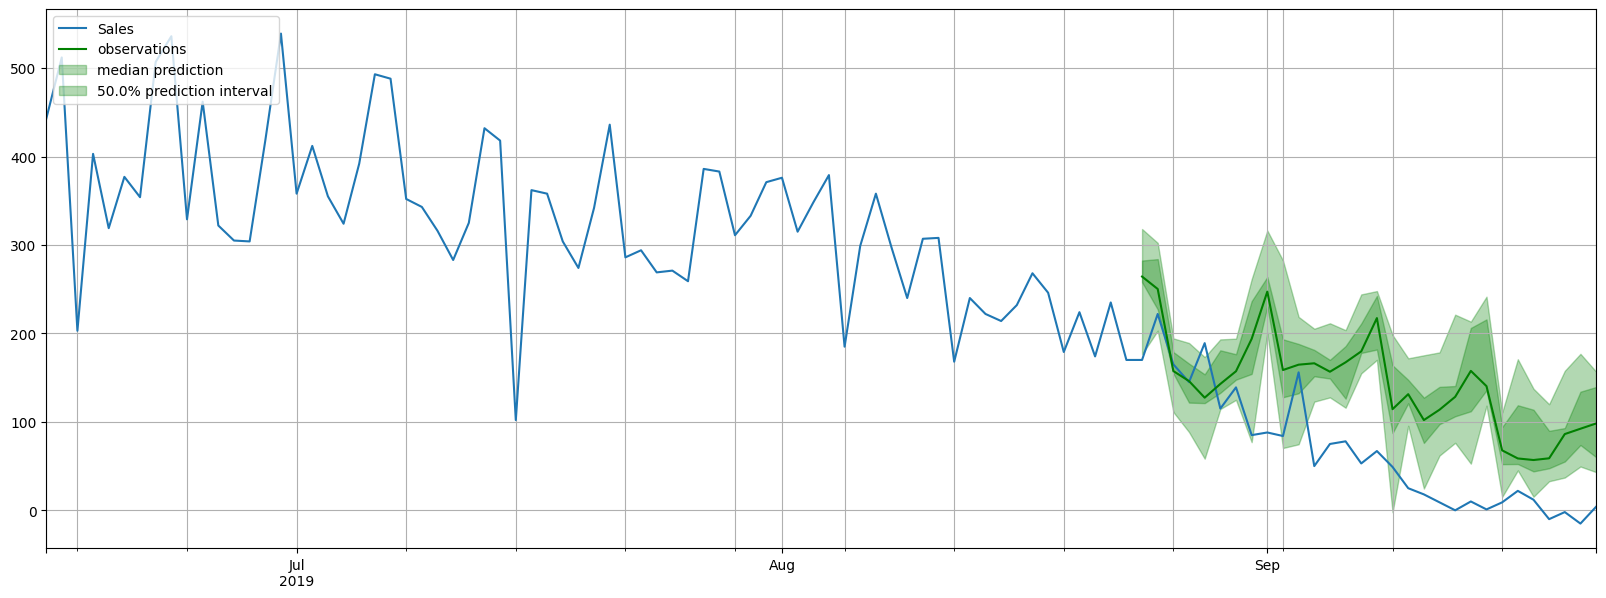

In [33]:
ts_entry = tss[0]
test_ds_entry = next(iter(test_ds))
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

## Time series modeling Error result

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(list(forecast_entry.quantile(0.5)), list(ts_entry[0][-30:]), squared=False) #ts_entry# -

92.24574000662372

In [35]:
mean_absolute_percentage_error(list(forecast_entry.quantile(0.5)), list(ts_entry[0][-30:]))

0.628365502954573

# 🥇Session 3
**┗ RandomForest 활용 모델링**  
---

## Make a dataset for RandomForestRegressor

In [42]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape


---

1. **모듈 임포트**:
    - `linregress`: `scipy.stats` 모듈에서 선형 회귀 분석을 위한 함수입니다.
    - `train_test_split`: `sklearn.model_selection` 모듈에서 데이터를 학습 세트와 테스트 세트로 분리하기 위한 함수입니다.
    - `RandomForestRegressor`: `sklearn.ensemble` 모듈에서 랜덤 포레스트 회귀 분석을 위한 클래스입니다.

2. **`get_slope` 함수**:
    - 이 함수는 주어진 배열을 사용하여 선형 회귀 분석을 수행하고 기울기(=slope)를 반환합니다.
    - `y`: 입력 배열을 넘파이 배열로 변환합니다.
    - `x`: 배열의 길이에 해당하는 연속적인 정수값(인덱스)을 생성합니다.
    - `linregress`: `x`와 `y` 값을 사용하여 선형 회귀 분석을 수행하고, 기울기, 절편, 상관 계수, p-값, 표준 오차 등의 값을 반환합니다.
    - 이 함수는 위에서 얻은 기울기 값을 반환합니다.

3. **`evaluate` 함수**:
    - 이 함수는 주어진 모델과 테스트 데이터를 사용하여 모델의 성능을 평가하고, 평균 절대 백분율 오차(MAPE) 값을 반환합니다.
    - `predictions`: 주어진 모델을 사용하여 테스트 특성에 대한 예측값을 생성합니다.
    - `errors`: 예측값과 실제 레이블 간의 절대 오차를 계산합니다.
    - `mape`: 오차를 실제 레이블로 나눈 후 평균을 구하고 100을 곱하여 평균 절대 백분율 오차를 계산합니다.
    - 이 함수는 계산된 MAPE 값을 반환합니다.

---

위의 코드는 선형 회귀 분석의 기울기를 얻기 위한 함수와 랜덤 포레스트 회귀 모델의 성능을 평가하기 위한 함수를 제공합니다.

In [43]:
rdf = df

In [44]:
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,-0.002597,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-28,0.0,0.0,-0.003896,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-29,0.0,0.0,-0.005195,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-30,0.0,0.0,-0.006494,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0


In [45]:
rdf['slope7'] = rdf['sales'].rolling(7).apply(get_slope, raw=True)
rdf['slope21'] = rdf['sales'].rolling(21).apply(get_slope, raw=True)

rdf['std7'] = rdf['sales'].rolling(7).std(raw=True)
rdf['std21'] = rdf['sales'].rolling(21).std(raw=True)

rdf['mean7'] = rdf['sales'].rolling(7).mean(raw=True)
rdf['mean21'] = rdf['sales'].rolling(21).mean(raw=True)

rdf['skew7'] = rdf['sales'].rolling(7).skew()
rdf['skew21'] = rdf['sales'].rolling(21).skew()

rdf['kurt7'] = rdf['sales'].rolling(7).kurt()
rdf['kurt21'] = rdf['sales'].rolling(21).kurt()

rdf['min7'] = rdf['sales'].rolling(7).min()
rdf['min21'] = rdf['sales'].rolling(21).min()

rdf['max7'] = rdf['sales'].rolling(7).max()
rdf['max21'] = rdf['sales'].rolling(21).max()

rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,-0.002597,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-28,0.0,0.0,-0.003896,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-29,0.0,0.0,-0.005195,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-30,0.0,0.0,-0.006494,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0



---

이 코드는 `rdf`라는 DataFrame에 저장된 'sales' 열의 시계열 데이터를 바탕으로 다양한 통계적 특징을 계산하고, 이를 새로운 열로 추가하는 작업을 수행합니다.

1. **기울기 계산**:
    - `rolling(7)`와 `rolling(21)`은 각각 7일 및 21일의 이동 창을 사용하여 시계열 데이터에 대한 작업을 수행합니다.
    - `apply(get_slope, raw=True)`를 사용하여 해당 이동 창 내의 데이터에 대해 `get_slope` 함수를 적용하고 기울기를 계산합니다. 계산된 기울기는 `slope7` 및 `slope21` 열에 저장됩니다.

2. **표준편차 계산**:
    - `.std(raw=True)`를 사용하여 7일 및 21일 이동 창에 대한 표준편차를 계산하고, 이를 `std7` 및 `std21` 열에 저장합니다.

3. **평균 계산**:
    - `.mean(raw=True)`를 사용하여 7일 및 21일 이동 창의 평균 값을 계산하고, `mean7` 및 `mean21` 열에 저장합니다.

4. **왜도 계산**:
    - `.skew()`를 사용하여 7일 및 21일 이동 창의 왜도(데이터의 비대칭도를 나타내는 값)를 계산하고, `skew7` 및 `skew21` 열에 저장합니다.

5. **첨도 계산**:
    - `.kurt()`를 사용하여 7일 및 21일 이동 창의 첨도(데이터 분포의 꼬리 두께를 나타내는 값)를 계산하고, `kurt7` 및 `kurt21` 열에 저장합니다.

6. **최소값 계산**:
    - `.min()`를 사용하여 7일 및 21일 이동 창의 최소값을 계산하고, `min7` 및 `min21` 열에 저장합니다.

7. **최대값 계산**:
    - `.max()`를 사용하여 7일 및 21일 이동 창의 최대값을 계산하고, `max7` 및 `max21` 열에 저장합니다.

8. **DataFrame 출력**:
    - 마지막으로 `rdf` DataFrame을 출력합니다.

---

이 코드는 주어진 시계열 데이터의 다양한 통계적 특징을 계산하여 원래의 DataFrame에 추가하는 작업을 수행합니다. 이렇게 계산된 특징들은 시계열 예측, 분석, 또는 다른 머신러닝 모델에 사용될 수 있습니다.

In [46]:
rdf = rdf[31:-122]
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-02-01,57.0,10.428571,3.935065,29.668807,28.585461,55.285714,26.142857,0.707934,1.414898,-0.996791,1.687694,21.0,0.0,100.0,100.0
2016-02-02,73.0,7.428571,4.170130,25.927555,29.665597,62.714286,29.619048,0.432936,1.131092,-1.569140,0.591354,33.0,0.0,100.0,100.0
2016-02-03,79.0,4.928571,4.388312,22.779481,30.712337,69.285714,33.380952,-0.009294,0.890337,-1.599134,-0.201782,41.0,0.0,100.0,100.0
2016-02-04,96.0,3.750000,4.724675,20.796062,32.582934,77.142857,37.952381,-0.605401,0.728907,-0.889447,-0.711343,44.0,1.0,100.0,100.0
2016-02-05,82.0,-0.464286,4.797403,14.797040,32.904624,82.571429,41.714286,-0.671901,0.525719,0.109354,-1.088270,57.0,1.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,145.0,-6.250000,-6.789610,32.690468,56.287316,183.000000,227.809524,0.895658,0.599335,-0.546034,-0.107521,145.0,145.0,235.0,358.0
2019-08-28,189.0,-6.892857,-5.433766,32.493223,48.250290,185.142857,219.761905,0.641046,0.395539,-0.840631,-0.665575,145.0,145.0,235.0,308.0
2019-08-29,115.0,-7.285714,-5.690909,33.446475,49.996905,168.000000,211.095238,0.035360,0.224170,0.890255,-0.180060,115.0,115.0,222.0,308.0
2019-08-30,139.0,-10.107143,-6.214286,35.146632,51.899078,163.571429,206.285714,0.431834,0.350925,0.142680,-0.307589,115.0,115.0,222.0,308.0


##Split data into train/test

In [47]:
y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)



---

1. **데이터 설정**:
    - `y = rdf['sales']`: `rdf`라는 DataFrame에서 'sales' 열을 가져와서 `y` 변수에 저장합니다. `y`는 예측하고자 하는 대상 변수(종속 변수)입니다.
    - `X = rdf.drop('sales', axis=1).fillna(0)`: 'sales' 열을 제외한 나머지 모든 열을 가져와서 `X` 변수에 저장합니다. 이 때, 누락된 값은 0으로 채워집니다. `X`는 예측에 사용될 특성들(독립 변수들)입니다.

2. **데이터의 시간적 정렬 조정**:
    - `X = X[:-30]`: `X`의 마지막 30개의 데이터를 제외하고 나머지를 `X`에 다시 저장합니다.
    - `y = y[30:]`: `y`의 처음 30개의 데이터를 제외하고 나머지를 `y`에 다시 저장합니다.

   위의 두 줄은 `X`와 `y`의 시간적 정렬을 조정하기 위해 사용됩니다. 예를 들어, 7일 또는 21일의 이동 평균 등의 통계적 특징을 계산할 때 앞쪽 데이터는 해당 특징을 계산할 수 없으므로, 이를 조정하기 위해 사용됩니다.

3. **학습 및 테스트 데이터 분리**:
    - `train_test_split` 함수를 사용하여 `X`와 `y` 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
    - `test_size = 0.03`: 전체 데이터 중 3%를 테스트 데이터로 사용합니다.
    - `random_state = 0`: 재현 가능성을 위해 랜덤 시드를 설정합니다.
    - `shuffle=False`: 데이터를 분리할 때 시간 순서대로 분리하도록 설정합니다. 시계열 데이터를 다룰 때 중요한 설정입니다.

---

이 코드는 주어진 시계열 데이터를 특성(`X`)과 대상 변수(`y`)로 분리하고, 이를 다시 학습 데이터와 테스트 데이터로 분리하는 작업을 수행합니다.

MAPE: 63.40072156296858


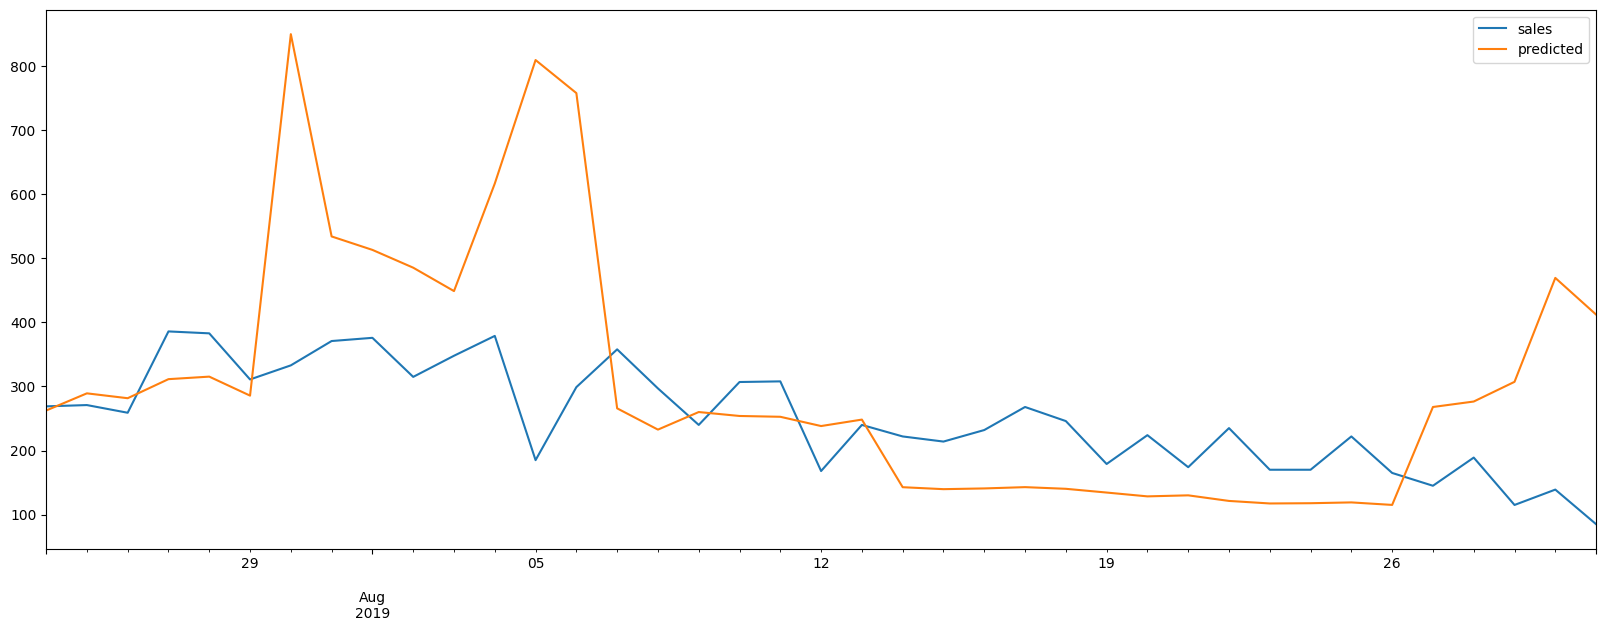

In [48]:
# Default 세팅으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")



---

1. **RandomForestRegressor 모델 초기화**:
    - `rf = RandomForestRegressor(random_state = 0)`: 랜덤 포레스트 회귀 모델을 초기화하고, 재현 가능성을 위해 랜덤 시드를 0으로 설정합니다.

2. **모델 학습**:
    - `rf.fit(train_features, train_labels)`: 학습 데이터인 `train_features`와 `train_labels`를 사용하여 랜덤 포레스트 모델을 학습시킵니다.

3. **모델 평가**:
    - `mape = evaluate(rf, test_features, test_labels)`: 앞서 정의된 `evaluate` 함수를 사용하여 학습된 모델의 성능을 평가하고, 평균 절대 백분율 오차(MAPE) 값을 계산합니다.

4. **예측 결과 생성 및 시각화**:
    - `predicted = rf.predict(test_features)`: 학습된 모델을 사용하여 테스트 데이터의 예측값을 생성합니다.
    - `pdf = pd.DataFrame(test_labels)`: 실제 테스트 레이블 값을 DataFrame 형태로 변환합니다.
    - `pdf['predicted'] = predicted`: 예측된 결과를 'predicted'라는 열 이름으로 `pdf` DataFrame에 추가합니다.
    - `pdf.plot(figsize=(20, 7))`: 실제 값과 예측값을 함께 그래프로 시각화합니다. 그래프의 크기는 20x7로 설정되어 있습니다.

5. **성능 지표 출력**:
    - `print(f"MAPE: {mape}")`: 계산된 MAPE 값을 출력합니다.

---

이 코드는 랜덤 포레스트 회귀 모델을 학습하고, 학습된 모델로 테스트 데이터의 예측값을 생성하여 실제 값과 함께 시각화하는 작업을 수행합니다. 또한, 모델의 성능을 평가하여 MAPE 값을 출력합니다.

## Tune by hand to decrease underfitting

MAPE: 31.949452461456456


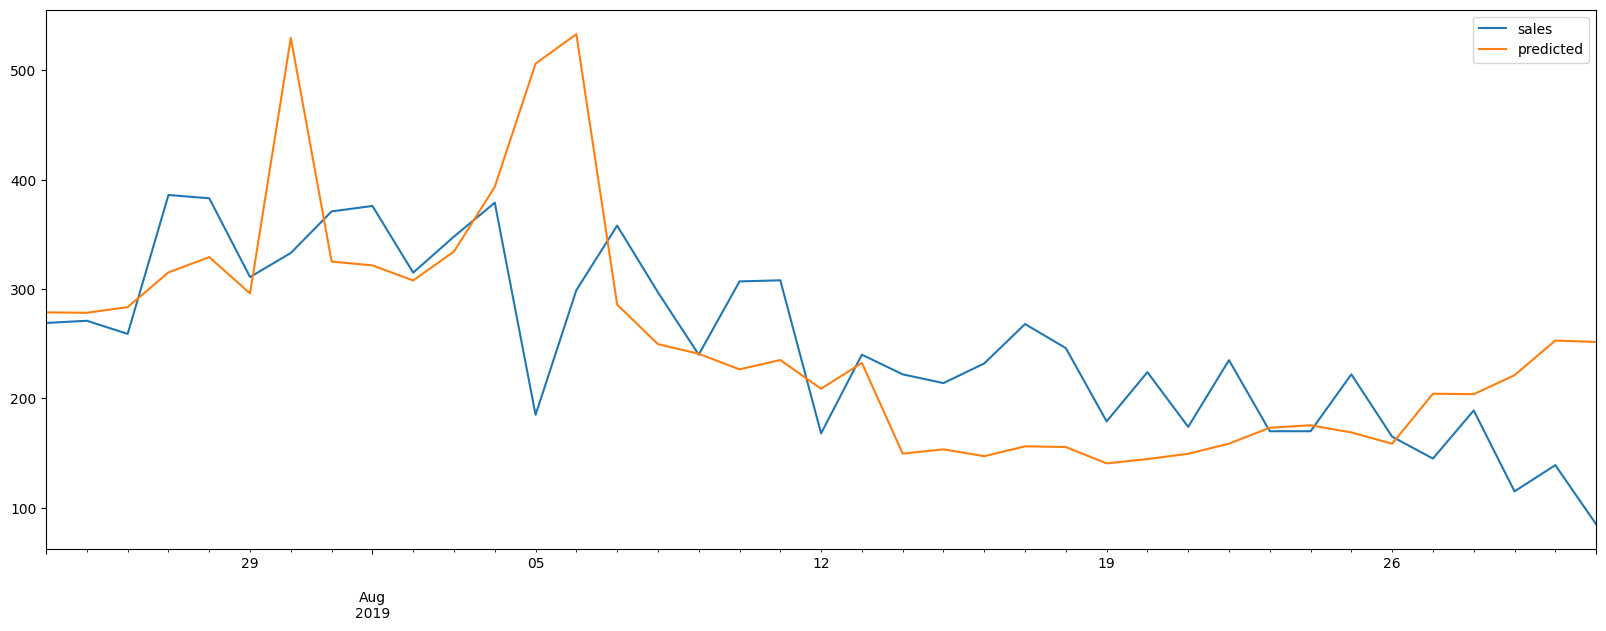

In [49]:
# Under fitting을 조정하기 위한 n_estimator와 max_features만 조정
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")



---

1. **RandomForestRegressor 모델 초기화 (파라미터 조정 포함)**:
    - `rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)`: 랜덤 포레스트 회귀 모델을 초기화합니다. 이때, 아래의 파라미터들이 조정되었습니다.
        - `random_state = 0`: 재현 가능성을 위한 랜덤 시드를 설정합니다.
        - `n_estimators=200`: 랜덤 포레스트에서 사용할 결정 트리의 개수를 200으로 설정합니다.
        - `max_features=4`: 각 결정 트리에서 사용할 특성의 최대 개수를 4로 설정합니다.

    이러한 파라미터 조정은 모델의 언더피팅 문제를 해결하기 위한 시도로 보입니다.

2. **모델 학습**:
    - `rf.fit(train_features, train_labels)`: 학습 데이터인 `train_features`와 `train_labels`를 사용하여 랜덤 포레스트 모델을 학습시킵니다.

3. **모델 평가**:
    - `mape = evaluate(rf, test_features, test_labels)`: 앞서 정의된 `evaluate` 함수를 사용하여 학습된 모델의 성능을 평가하고, 평균 절대 백분율 오차(MAPE) 값을 계산합니다.

4. **예측 결과 생성 및 시각화**:
    - `predicted = rf.predict(test_features)`: 학습된 모델을 사용하여 테스트 데이터의 예측값을 생성합니다.
    - `pdf = pd.DataFrame(test_labels)`: 실제 테스트 레이블 값을 DataFrame 형태로 변환합니다.
    - `pdf['predicted'] = predicted`: 예측된 결과를 'predicted'라는 열 이름으로 `pdf` DataFrame에 추가합니다.
    - `pdf.plot(figsize=(20, 7))`: 실제 값과 예측값을 함께 그래프로 시각화합니다. 그래프의 크기는 20x7로 설정되어 있습니다.

5. **성능 지표 출력**:
    - `print(f"MAPE: {mape}")`: 계산된 MAPE 값을 출력합니다.

---

이 코드는 랜덤 포레스트 회귀 모델의 파라미터를 조정하여 모델을 학습하고, 학습된 모델로 테스트 데이터의 예측값을 생성하여 실제 값과 함께 시각화하는 작업을 수행합니다. 또한, 모델의 성능을 평가하여 MAPE 값을 출력합니다.

## Add more feature to consider additional characteristics

In [50]:
#해마다 늘어나는 판매량 반영
rdf['year'] = rdf.index.year
#월마다 바뀌는 판매량 반영
rdf['month'] = rdf.index.month
#요일별 판매량 반영
rdf['weekofday'] = rdf.index.dayofweek

y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)


---

1. **날짜 정보에서 특성 추출**:
    - `rdf['year'] = rdf.index.year`: `rdf`의 인덱스에서 연도 정보를 추출하여 새로운 'year' 열에 저장합니다.
    - `rdf['month'] = rdf.index.month`: `rdf`의 인덱스에서 월 정보를 추출하여 새로운 'month' 열에 저장합니다.
    - `rdf['weekofday'] = rdf.index.dayofweek`: `rdf`의 인덱스에서 요일 정보를 추출하여 새로운 'weekofday' 열에 저장합니다. (0: 월요일, 1: 화요일, ..., 6: 일요일)

   위의 작업을 통해 연, 월, 요일에 따른 판매량의 변동성을 반영할 수 있는 추가적인 특성들을 생성합니다.

2. **데이터 설정**:
    - `y = rdf['sales']`: `rdf`에서 'sales' 열을 가져와서 `y` 변수에 저장합니다. `y`는 예측하고자 하는 대상 변수(종속 변수)입니다.
    - `X = rdf.drop('sales', axis=1).fillna(0)`: 'sales' 열을 제외한 나머지 모든 열을 가져와서 `X` 변수에 저장합니다. 이 때, 누락된 값은 0으로 채워집니다. `X`는 예측에 사용될 특성들(독립 변수들)입니다.

3. **데이터의 시간적 정렬 조정**:
    - `X = X[:-30]`: `X`의 마지막 30개의 데이터를 제외하고 나머지를 `X`에 다시 저장합니다.
    - `y = y[30:]`: `y`의 처음 30개의 데이터를 제외하고 나머지를 `y`에 다시 저장합니다.

4. **학습 및 테스트 데이터 분리**:
    - `train_test_split` 함수를 사용하여 `X`와 `y` 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
    - `test_size = 0.03`: 전체 데이터 중 3%를 테스트 데이터로 사용합니다.
    - `random_state = 0`: 재현 가능성을 위해 랜덤 시드를 설정합니다.
    - `shuffle=False`: 데이터를 분리할 때 시간 순서대로 분리하도록 설정합니다. 시계열 데이터를 다룰 때 중요한 설정입니다.

---

이 코드는 주어진 시계열 데이터에서 연, 월, 요일에 따른 판매량의 특성을 추가하고, 이를 특성(`X`)과 대상 변수(`y`)로 분리한 후, 학습 데이터와 테스트 데이터로 분리하는 작업을 수행합니다.

MAPE: 20.541401180000847


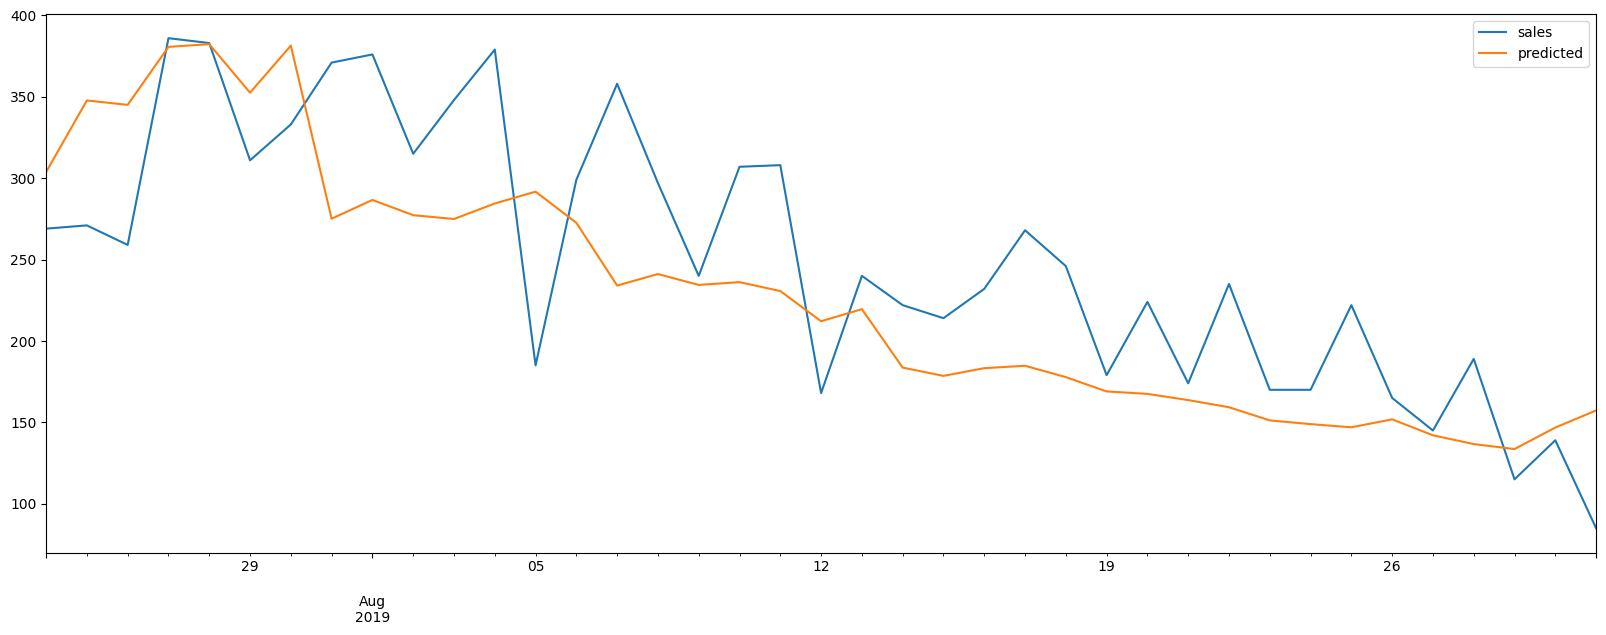

In [51]:
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")



---

1. **RandomForestRegressor 모델 초기화 (파라미터 조정 포함)**:
    - `rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)`: 랜덤 포레스트 회귀 모델을 초기화합니다. 이때, 아래의 파라미터들이 조정되었습니다.
        - `random_state = 0`: 재현 가능성을 위한 랜덤 시드를 설정합니다.
        - `n_estimators=200`: 랜덤 포레스트에서 사용할 결정 트리의 개수를 200으로 설정합니다.
        - `max_features=4`: 각 결정 트리에서 사용할 특성의 최대 개수를 4로 설정합니다.

    이러한 파라미터 조정은 모델의 성능 향상을 위한 시도로 보입니다.

2. **모델 학습**:
    - `rf.fit(train_features, train_labels)`: 학습 데이터인 `train_features`와 `train_labels`를 사용하여 랜덤 포레스트 모델을 학습시킵니다.

3. **모델 평가**:
    - `mape = evaluate(rf, test_features, test_labels)`: 앞서 정의된 `evaluate` 함수를 사용하여 학습된 모델의 성능을 평가하고, 평균 절대 백분율 오차(MAPE) 값을 계산합니다.

4. **예측 결과 생성 및 시각화**:
    - `predicted = rf.predict(test_features)`: 학습된 모델을 사용하여 테스트 데이터의 예측값을 생성합니다.
    - `pdf = pd.DataFrame(test_labels)`: 실제 테스트 레이블 값을 DataFrame 형태로 변환합니다.
    - `pdf['predicted'] = predicted`: 예측된 결과를 'predicted'라는 열 이름으로 `pdf` DataFrame에 추가합니다.
    - `pdf.plot(figsize=(20, 7))`: 실제 값과 예측값을 함께 그래프로 시각화합니다. 그래프의 크기는 20x7로 설정되어 있습니다.

5. **성능 지표 출력**:
    - `print(f"MAPE: {mape}")`: 계산된 MAPE 값을 출력합니다.

---

이 코드는 랜덤 포레스트 회귀 모델의 파라미터를 조정하여 모델을 학습하고, 학습된 모델로 테스트 데이터의 예측값을 생성하여 실제 값과 함께 시각화하는 작업을 수행합니다. 또한, 모델의 성능을 평가하여 MAPE 값을 출력합니다.

#Lesson and Learned

## 시계열 분석에서 가장 중요한 부분은 무엇일까?

### 1. 데이터 확인이 무엇보다 중요한 분석이 시계열 분석이다.
### 2. 날짜형 데이터 타입을 다룰 때, 날짜 형식이 데이터 원천에 따라 다를 수 있으므로 날짜 형식을 가장 먼저 확인해야 한다.
### 3. 다음으로는 날짜 사이에 결측이 있는지를 꼭 확인해야 하며, 결측이 있는 경우 학습이 제대로 되지 않을 수 있다.
### 4. RNN을 사용하는 경우, 데이터의 특성을 충분히 반영할 수 있는 hyperparameter를 세팅해야 한다.

## 단변량 데이터로만으로는 시계열의 특성이 반영되지 않는다고 판단될 때,

### 1. 단변량 데이터를 특정 Window size를 기준으로 다변량으로 feature를 생성하여 Regression 방법으로 바꿔볼 수 있다.
### 2. 항상 더 좋은 결과를 기대할 수는 없지만, 본 실습에서의 문제처럼 요일별로 특성을 나타내는 경우에는 효과가 좋다.
### 3. 본 실습에서는 hyperparameter를 DeepAR과 RandomForest 모두 튜닝하지 않았지만 튜닝까지 할 경우 더 나을 결과를 기대할 수 있다.